# **Exploratory Data Analysis (EDA):**

## **Import Important Libraries and Modules:**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## **Export Target Dataframe:**

In [2]:
df = pd.read_csv('D:\\IT Courses\\Data Analysis Courses\\Data Analysis Projects\\Hotels Exploratory Data Analysis (EDA) Project\\Hotels_Exploratory_Data_Analysis_EDA_Project\\Dataset\\cleaned_formatted_hotels_df.csv')         

df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118897 entries, 0 to 118896
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118897 non-null  object        
 1   is_canceled                     118897 non-null  object        
 2   lead_time                       118897 non-null  int64         
 3   arrival_date_year               118897 non-null  int64         
 4   arrival_date_month              118897 non-null  object        
 5   arrival_date_week_number        118897 non-null  int64         
 6   arrival_date_day_of_month       118897 non-null  int64         
 7   stays_in_weekend_nights         118897 non-null  int64         
 8   stays_in_week_nights            118897 non-null  int64         
 9   adults                          118897 non-null  int64         
 10  children                        118897 non-null  float64

## **1. Cancellation Status Frequency Plotting:**

Text(0, 0.5, 'Percent %')

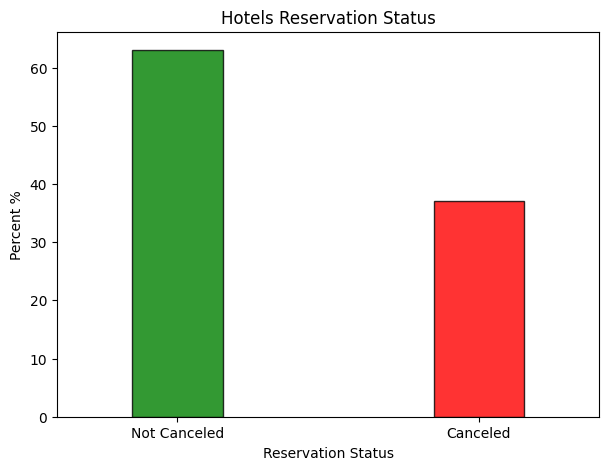

In [4]:
plt.figure(figsize=(7,5))
round(df['is_canceled'].value_counts(normalize=True) * 100).plot(
    kind='bar',
    color=['green', 'red'],
    width=0.3,
    alpha=0.8,
    edgecolor='k'
)
plt.title('Hotels Reservation Status')
plt.xticks(rotation=0)
plt.xlabel('Reservation Status')
plt.ylabel('Percent %')

## **2. Cancellation Status Frequency Every Hotels (Resort Hotel - City Hotel):**

[Text(0, 0, 'City Hotel'), Text(1, 0, 'Resort Hotel')]

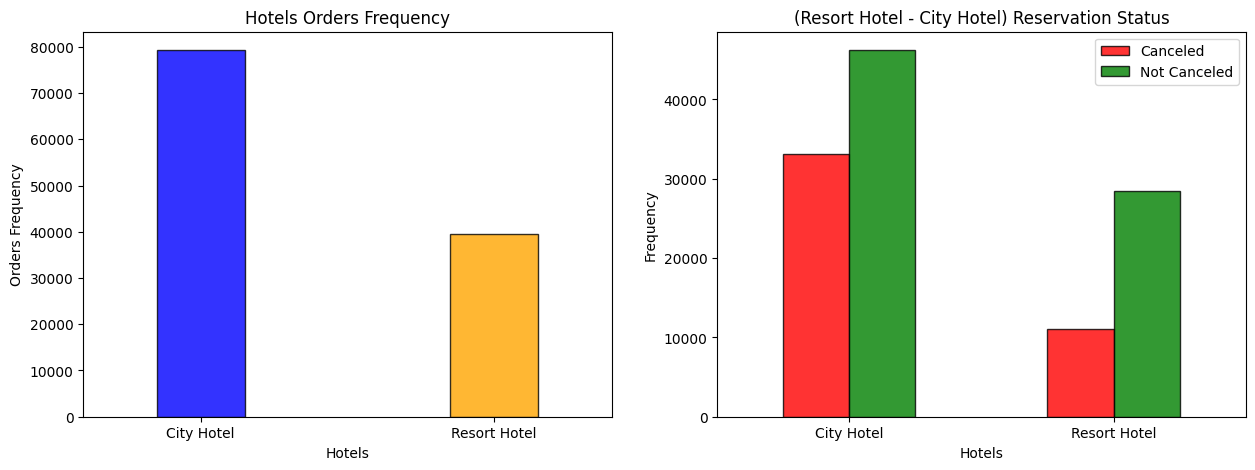

In [5]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

hotels_labels = []
for hotel in df['hotel'].value_counts().index:
    hotels_labels.append(hotel)

df['hotel'].value_counts().plot(
    kind='bar',
    color=['blue','orange'],
    edgecolor='black',
    width=0.3,
    alpha=0.8,
    ax=ax[0]
)
ax[0].set_title('Hotels Orders Frequency')
ax[0].set_xlabel('Hotels')
ax[0].set_ylabel('Orders Frequency')
ax[0].set_xticklabels(hotels_labels, rotation=0)

df.pivot_table(index='hotel', columns='is_canceled', aggfunc='size').plot(
    kind='bar',
    color=['red', 'green'],
    edgecolor='black',
    alpha=0.8,
    ax=ax[1]
)
ax[1].legend(title='')
ax[1].set_title('(Resort Hotel - City Hotel) Reservation Status')
ax[1].set_xlabel('Hotels')
ax[1].set_ylabel('Frequency')
ax[1].set_xticklabels(hotels_labels, rotation=0)

- Most booking were in the City Hotel.
- Cancellation in Resort Hotel is less than City Hotel.

## **3. Time Series Analysis of Average Daily Rates for City and Resort Hotels:**

In [6]:
adr_time_series = df.pivot_table(
    index='reservation_status_date',
    columns='hotel',
    values='adr',
    aggfunc='mean'
)

In [7]:
adr_time_series['City Hotel'].fillna((df[df['hotel'] == 'City Hotel'])['adr'].mean(), inplace=True)
adr_time_series['Resort Hotel'].fillna((df[df['hotel'] == 'Resort Hotel'])['adr'].mean(), inplace=True)

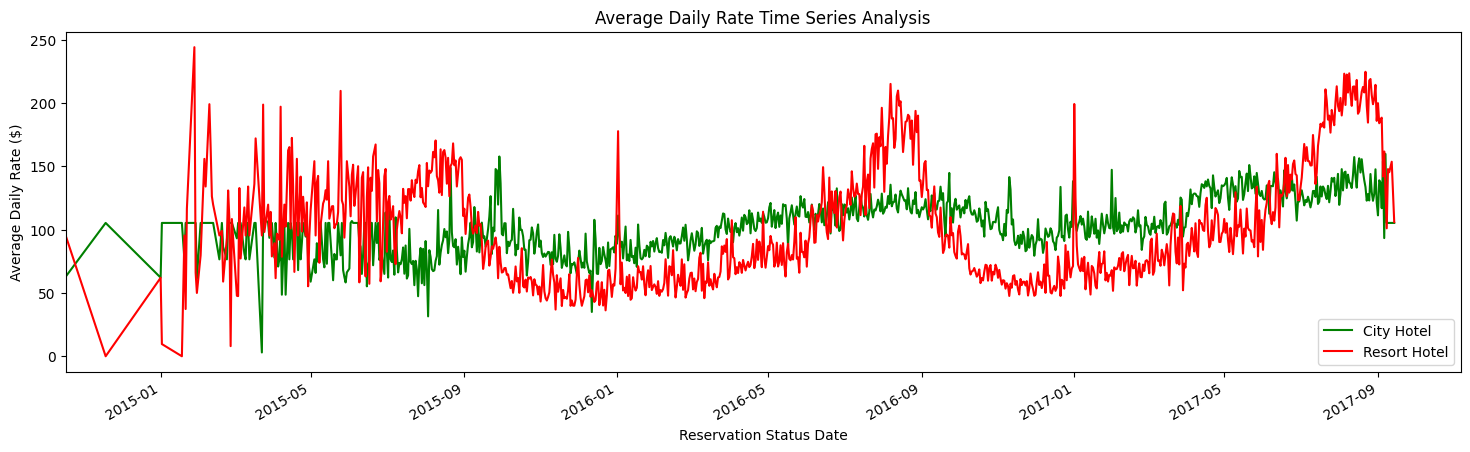

In [8]:
adr_time_series.plot(
    kind='line',
    figsize=(18,5),
    color=['green', 'red']
)
plt.legend()
plt.title('Average Daily Rate Time Series Analysis')
plt.xlabel('Reservation Status Date')
plt.ylabel('Average Daily Rate ($)')
plt.xlim(left=df['reservation_status_date'].min())
plt.show()

## **4. Monthly Trends in Hotels Booking Cancellation Rate:**

In [9]:
df['month_number'] = df['reservation_status_date'].dt.month

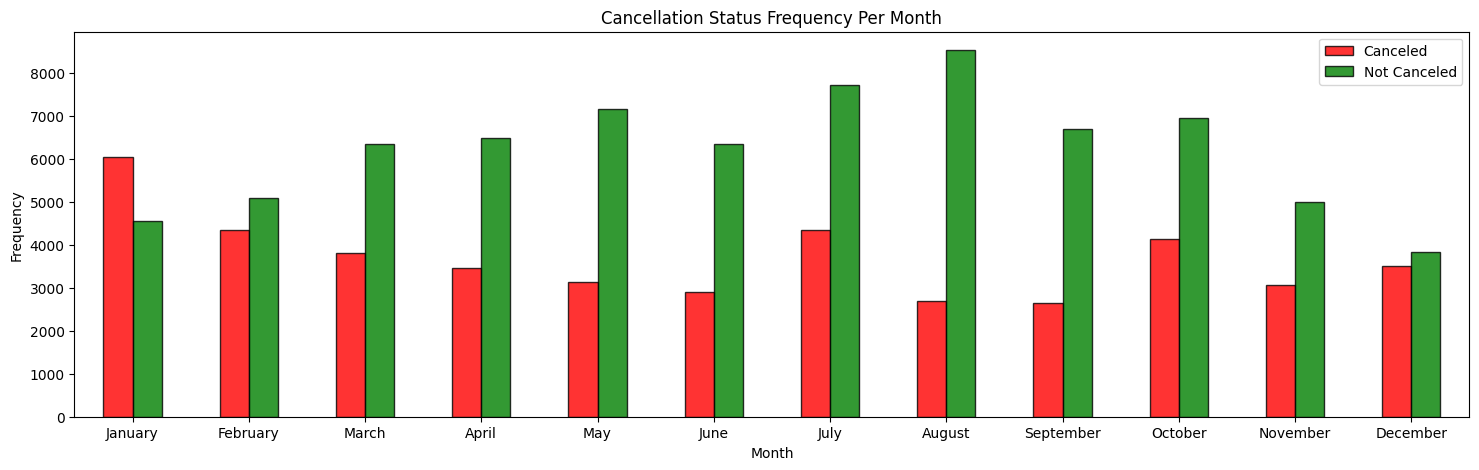

In [10]:
months_labels = [
    "January", "February", "March", "April",
    "May", "June", "July", "August",
    "September", "October", "November", "December"
]

ax = cancellation_months_pivot = df.pivot_table(
    index='month_number',
    columns='is_canceled',
    aggfunc='size'
).plot(
    kind='bar',
    color=['red', 'green'],
    alpha=0.8,
    edgecolor='black',
    figsize=(18,5)
)
ax.set_xticklabels(labels=months_labels, rotation=0)
plt.legend(title='')
plt.title('Cancellation Status Frequency Per Month')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.show()

## **5. Distribution of Cancellation Orders Across Top 10 Countries:**

In [11]:
country_cancellation_frec = (df[df['is_canceled'] == 'Canceled']).groupby(
    by=['country']
).agg(
    cancellation_frec=('is_canceled', 'size')
).sort_values(
    by=['cancellation_frec'],
    ascending=False
).reset_index().head(10)

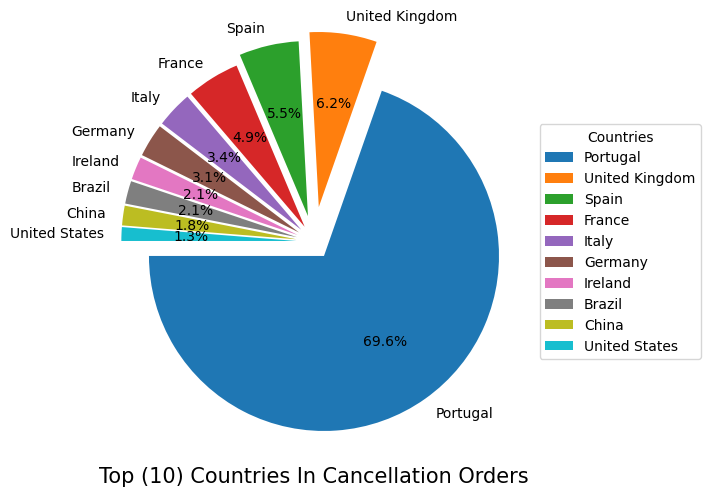

In [12]:
pie_explode = (0.1, 0.2, 0.15, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)
plt.pie(
    data=country_cancellation_frec,
    x='cancellation_frec',
    labels='country',
    autopct='%1.1f%%',
    startangle=180,
    explode=pie_explode
)
plt.legend(
    country_cancellation_frec['country'],
    title="Countries",
    loc="center left",
    bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.xlabel('Top (10) Countries In Cancellation Orders', size=15)
plt.show()

### **6. Analysis of Hotel Booking Order Frequencies Across Different Market Segments:**

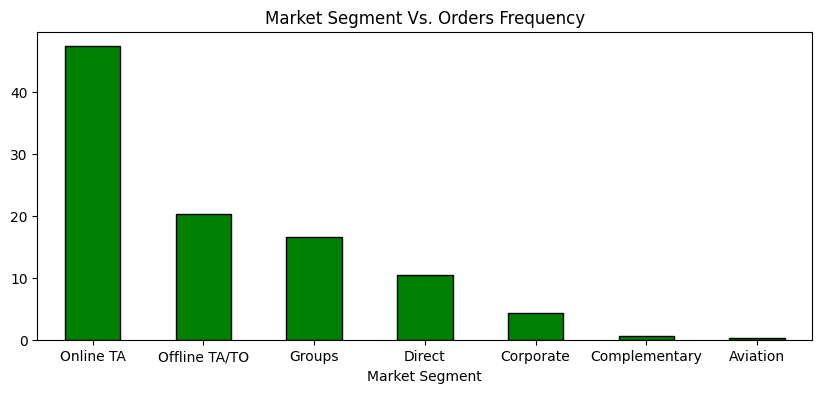

In [13]:
(df['market_segment'].value_counts(normalize=True) * 100).plot(
    kind='bar',
    color='green',
    edgecolor='black',
    figsize=(10,4)
)
plt.xticks(rotation=0)
plt.title('Market Segment Vs. Orders Frequency')
plt.xlabel('Market Segment')
plt.show()

### **7. Analysis of Hotel Booking Cancellation Frequencies Across Different Market Segments:**

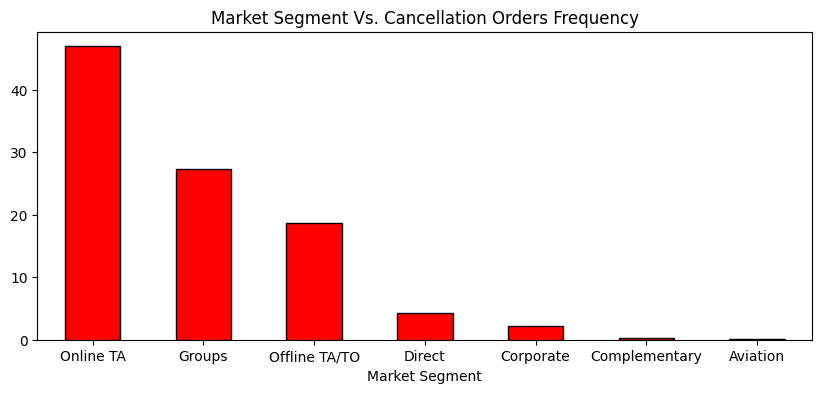

In [14]:
((df[df['is_canceled'] == 'Canceled'])['market_segment'].value_counts(normalize=True) * 100).plot(
    kind='bar',
    color='red',
    edgecolor='black',
    figsize=(10,4)
)
plt.xticks(rotation=0)
plt.title('Market Segment Vs. Cancellation Orders Frequency')
plt.xlabel('Market Segment')
plt.show()

### **8. Trends of Average Daily Rates for Canceled and Non-Canceled Hotel Orders Over Time for Resort and City Hotels:**

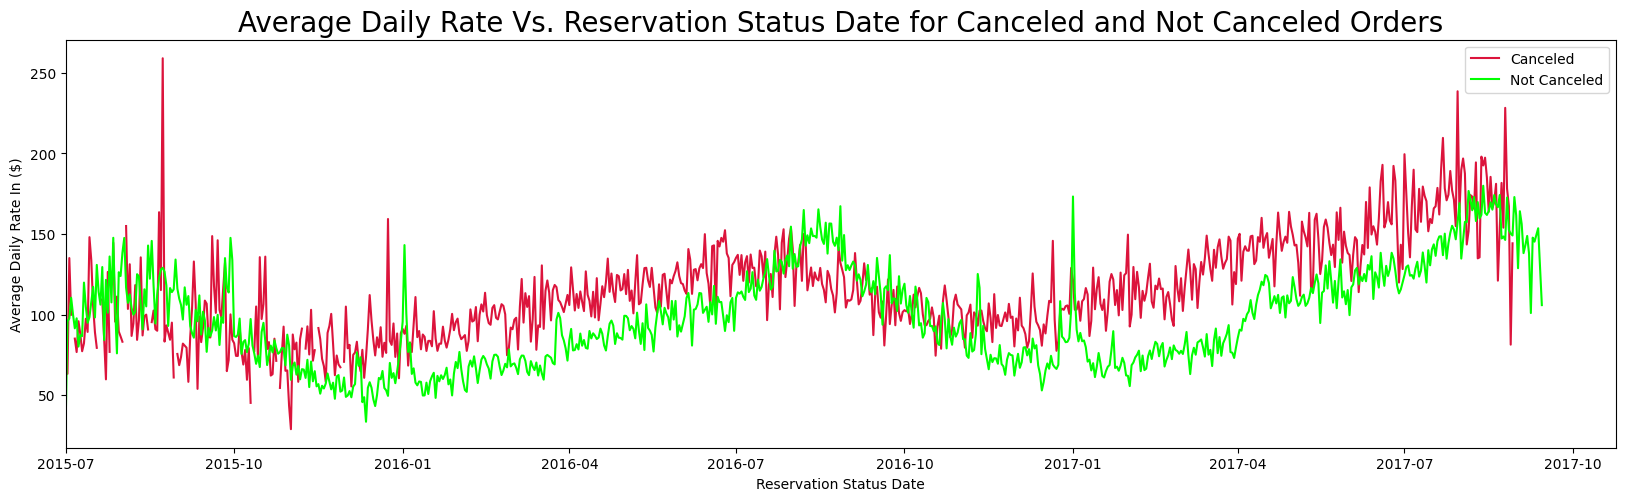

In [15]:
(df[df['reservation_status_date'] >= '2015-07-01']).pivot_table(
    index='reservation_status_date',
    columns='is_canceled',
    values='adr',
    aggfunc='mean'
).plot(
    kind='line',
    figsize=(20,6),
    color=['crimson', 'lime']
)
plt.xlim(left=(df[df['reservation_status_date'] >= '2015-07-01'])['reservation_status_date'].min())
plt.legend(title='', loc='best')
plt.xlabel('Reservation Status Date')
plt.ylabel('Average Daily Rate In ($)')
plt.title('Average Daily Rate Vs. Reservation Status Date for Canceled and Not Canceled Orders', size=20)
plt.xticks(rotation=0, ha='center')
plt.show()

### **9. Seasonal Variations in Average Daily Rates for City and Resort Hotels:**

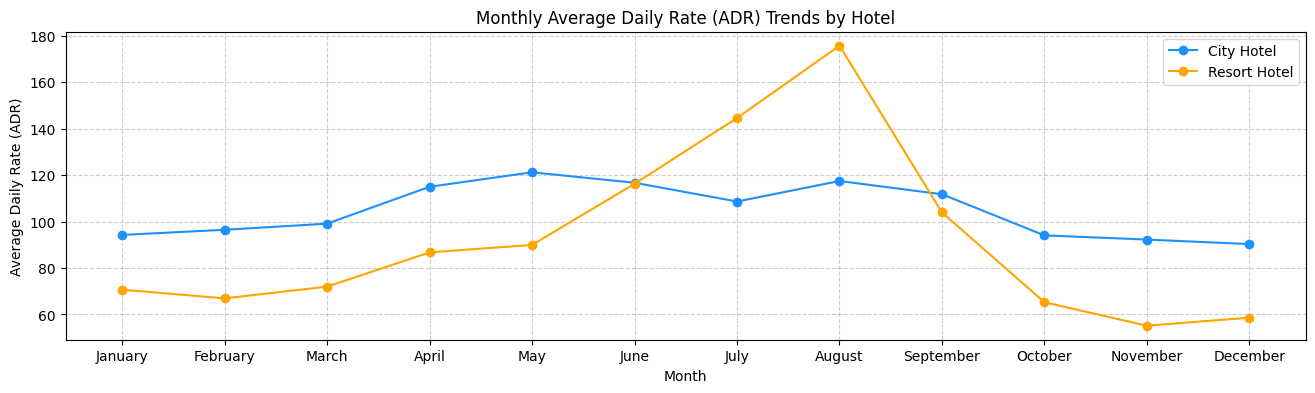

In [17]:
hotel_month_pivot = df.pivot_table(
    index='month_number',
    columns='hotel',
    values='adr',
    aggfunc='mean'
)

ax = hotel_month_pivot.plot(
    kind='line',
    color=['dodgerblue', 'orange'],
    figsize=(16,4),
    marker='o'
)

ax.set_xticks(range(1,13))
ax.set_xticklabels(rotation=0, labels=months_labels)
ax.set_xlabel('Month')
ax.set_ylabel('Average Daily Rate (ADR)')
ax.set_title('Monthly Average Daily Rate (ADR) Trends by Hotel')
ax.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='')
plt.show()